#### A Practical Machine Learning Guide

- Churn : "Leaving the company"

Aim: To build a supervised learning algorithm to perform classification task


In [23]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [24]:
df_churn = pd.read_csv('downloads/Churn_Modelling.csv')
df_churn.shape
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
c

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

The datasets contains 10000 customers and 14 features about the customers and their producs at a bank .

### Exploring the Data

In [26]:
df_churn.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)


In [27]:
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df_churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
df_churn.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [34]:
df_churn[['Geography', 'Gender','Exited']].groupby(['Geography', 'Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

Females are likely to churn  than male in all three countries.

The churn rate in Germany is higher than the churn rate in the other two countries.

France has the most customers.

<Figure size 720x432 with 0 Axes>

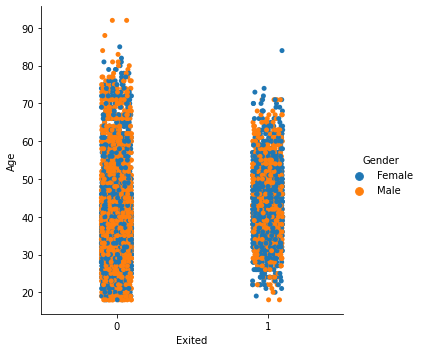

In [38]:
plt.figure(figsize = (10,6))
sns.catplot(x='Exited', y = 'Age', hue ='Gender', data= df_churn)

Age  does not cause a very significant difference in terms. of the customer churn. 

However, there are more older people on the not churn (exited = 0) side.

/Users/wanadam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

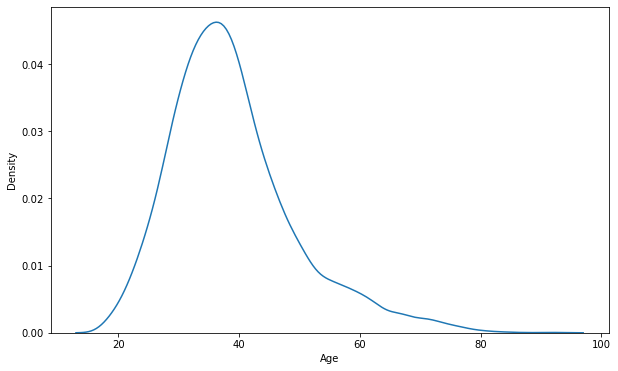

In [40]:
plt.figure(figsize=(10,6))
sns.distplot(df_churn['Age'], hist = False)

The distribution is right-skewed which indicates outliers on the right side. This is important when normalizing the features

In [41]:
df_churn[['Tenure','Exited']].groupby('Tenure').agg(['mean','count']).sort_values(by=[('Exited','mean')])

Exited      
            mean count
Tenure                
7       0.172179  1028
2       0.191794  1048
8       0.192195  1025
6       0.202689   967
4       0.205258   989
10      0.206122   490
5       0.206522  1012
3       0.211100  1009
9       0.216463   984
1       0.224155  1035
0       0.230024   413

In [44]:
gender = {'Female':0 , 'Male':1}
country = {'France':0 , 'Germany':1, 'Spain':2}
df_churn['Gender'].replace(gender, inplace = True)
df_churn['Geography'].replace(country, inplace = True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

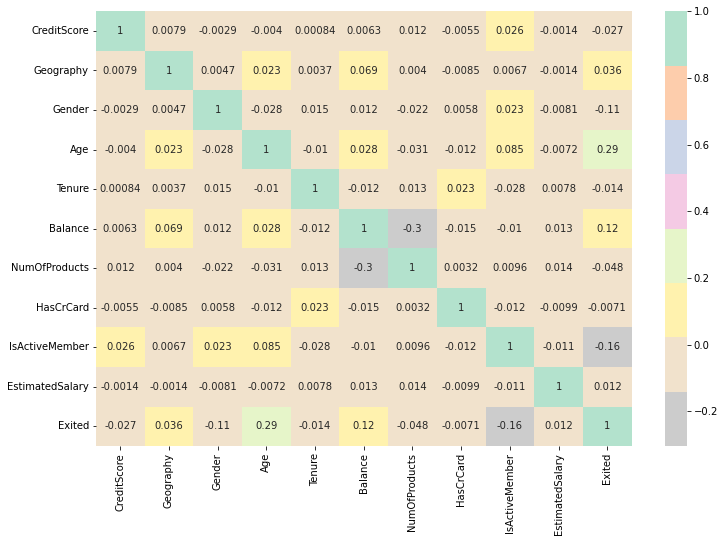

In [49]:
corr_matrix = df_churn.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap ='Pastel2_r', annot = True)

In [50]:
df_churn[['HasCrCard','Exited']].groupby('HasCrCard').agg(['mean','count'])

Exited      
               mean count
HasCrCard                
0          0.208149  2945
1          0.201843  7055

The average churn rate is almost the same for two values (0 and 1) of the "HasCrCar" feature

### Encoding Categorical Variables 